In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('doctorfees.csv')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
df.isnull()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,True,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False
5957,False,False,True,False,False,True,False
5958,False,False,False,False,False,False,False
5959,False,False,False,False,False,False,False


In [4]:
df.isnull().sum() # We can see that in Rating and Miscellaneous_Info there are many missing values are present

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [5]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

We can drop the irrevent columns as they are not going to make any impact on our final score to predict the doctors fees and more over in that column here are around 40% mising values

In [6]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [7]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


In [8]:
# We can fill the missing values by using imputer Function 

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Rating']=imp.fit_transform(df['Rating'].values.reshape(-1,1))
df['Place']=imp.fit_transform(df['Place'].values.reshape(-1,1))

In [11]:
# Lets check if there are any missing values left in this Dataset
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

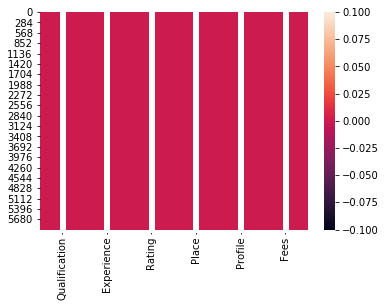

In [12]:
sns.heatmap(df.isnull(),annot=True)
plt.show()

From this Heatmap we can see that there is no - null or Mising values present as there is no color change in this Heatmap

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         5961 non-null   object
 3   Place          5961 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 279.5+ KB


As most of the columns are Objects and we cant apply Mathmatical function with objects so we need to convert them in to integer by using LabelEncoder Function


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df['Qualification']=le.fit_transform(df['Qualification'].astype('str'))
df['Experience']=le.fit_transform(df['Experience'].astype('str'))
df['Rating']=le.fit_transform(df['Rating'].astype('str'))
df['Place']=le.fit_transform(df['Place'].astype('str'))
df['Profile']=le.fit_transform(df['Profile'].astype('str'))

In [16]:
df.dtypes # Here we can see that all the columns are now converted into Int

Qualification    int32
Experience       int32
Rating           int32
Place            int32
Profile          int32
Fees             int64
dtype: object

In [17]:
df.corr()

,Qualification,Experience,Rating,Place,Profile,Fees
Qualification,1.000000,0.003325,0.055188,0.006640,0.393123,0.263214
Experience,0.003325,1.000000,-0.139696,0.001328,-0.032711,-0.048529
Rating,0.055188,-0.139696,1.000000,-0.031150,-0.101605,0.141853
Place,0.006640,0.001328,-0.031150,1.000000,0.019529,-0.052505
Profile,0.393123,-0.032711,-0.101605,0.019529,1.000000,0.145226
Fees,0.263214,-0.048529,0.141853,-0.052505,0.145226,1.000000


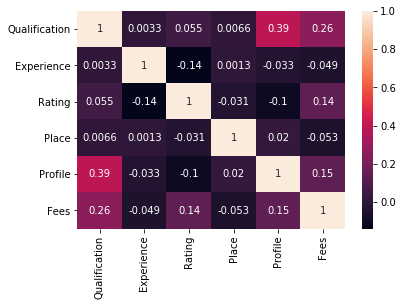

In [18]:
sns.heatmap(df.corr(),annot=True)

From this Heatmap we can see that there are less num of Negatively correlated columns and light color squares are positively coreleated and Dark colour squares are negatively corelated

In [19]:
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,16,0,299,5,100
1,73,3,49,866,0,350
2,1135,63,0,457,3,300
3,464,3,0,68,0,250
4,10,12,0,337,0,250
5,10,62,0,610,0,100
6,351,36,0,326,5,200
7,134,1,50,33,1,200
8,943,5,0,546,4,100
9,465,15,0,39,1,100


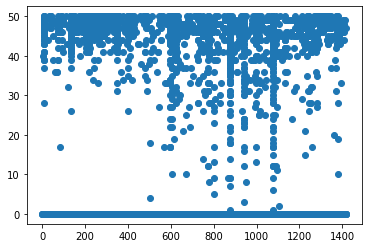

In [20]:
plt.scatter(df['Qualification'],df['Rating'])
plt.show()

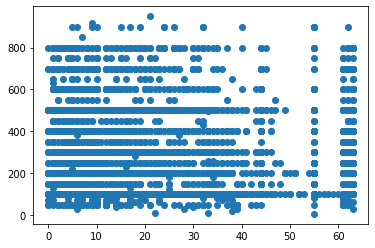

In [21]:
plt.scatter(df['Experience'],df['Fees'])
plt.show()

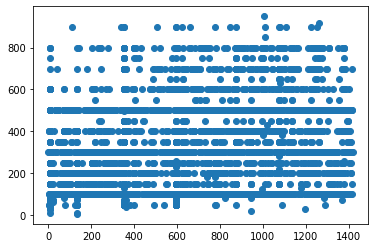

In [22]:
plt.scatter(df['Qualification'],df['Fees'])
plt.show()

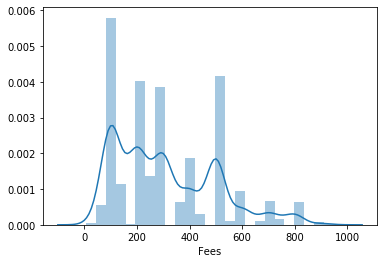

In [23]:
sns.distplot(df['Fees'])

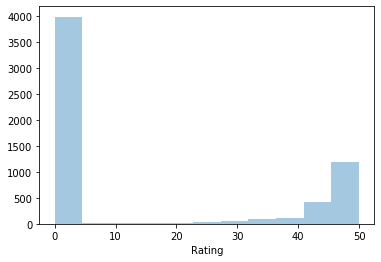

In [24]:
sns.distplot(df['Rating'],kde=False)

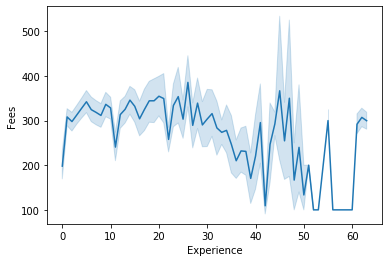

In [25]:
sns.lineplot(df['Experience'],df['Fees'])
plt.show()

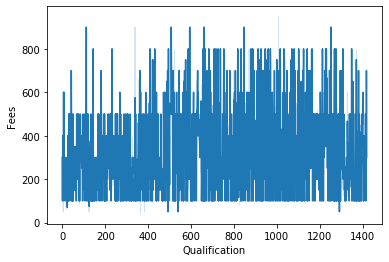

In [26]:
sns.lineplot(df['Qualification'],df['Fees'])
plt.show()

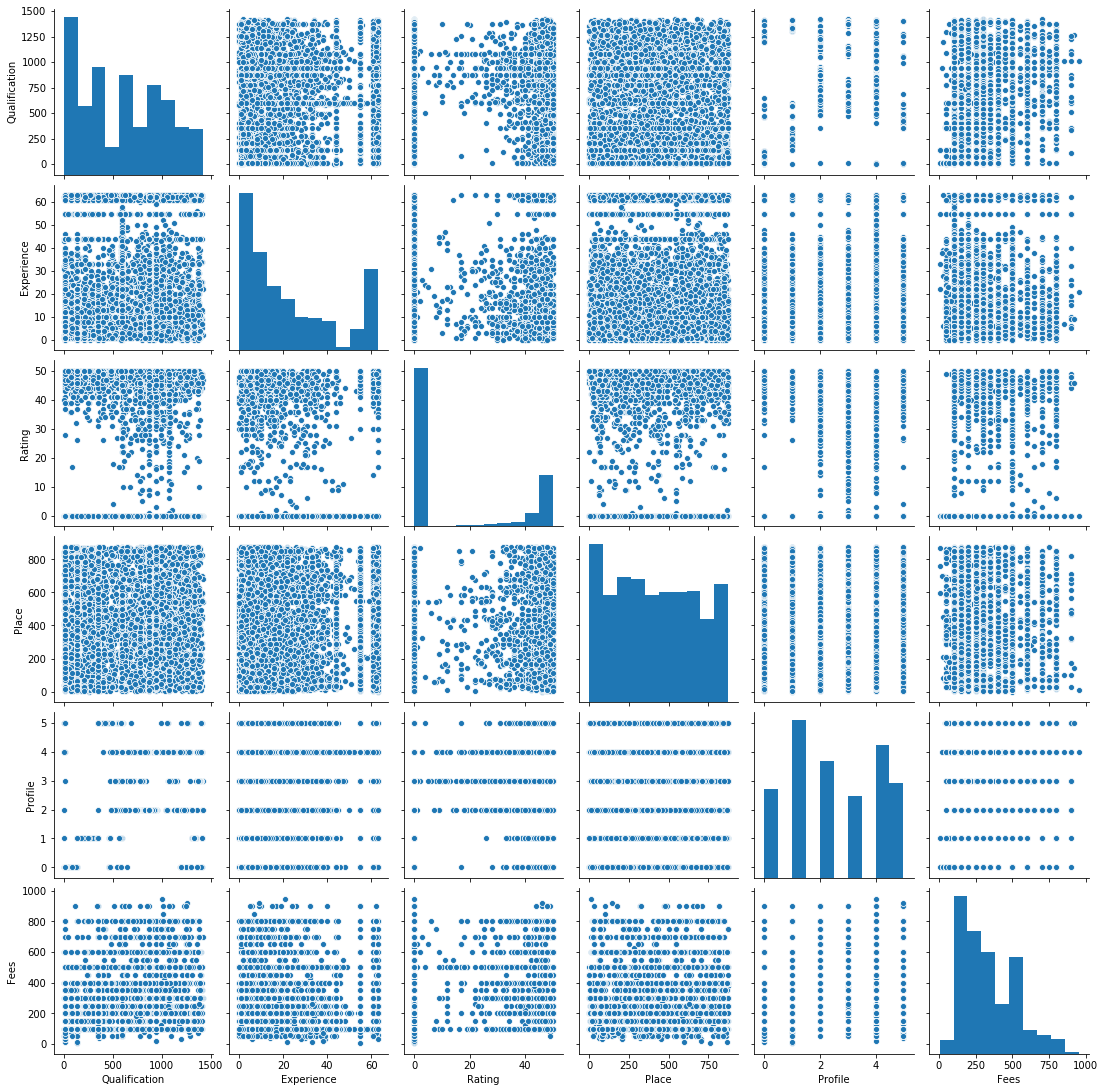

In [27]:
sns.pairplot(df)

In [28]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,14.534139,414.368059,2.441872,307.944640
std,413.842446,20.937163,21.137633,258.547684,1.658014,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,0.000000,197.000000,1.000000,150.000000
50%,596.000000,15.000000,0.000000,407.000000,2.000000,300.000000
75%,943.000000,36.000000,42.000000,628.000000,4.000000,500.000000
max,1419.000000,63.000000,50.000000,876.000000,5.000000,950.000000


In [29]:
# In some columns mean is greater then Media which is sign of ouliers present in the dataset

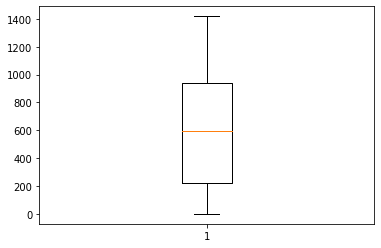

In [30]:
plt.boxplot(df['Qualification'])
plt.show()

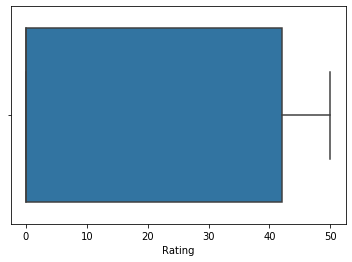

In [31]:
sns.boxplot(df['Rating'])

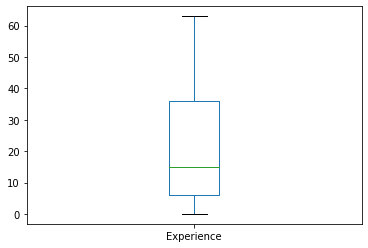

In [32]:
df['Experience'].plot.box()

In [33]:
# Lets check if there are s ome outliers present in this Dataset
from scipy.stats import zscore

In [34]:
z=np.abs(zscore(df))
z

array([[0.47330574, 0.33488263, 0.68765304, 0.44625322, 1.54301587,
        1.08926083],
       [1.26594438, 0.95584022, 1.63068173, 1.74694981, 1.47289258,
        0.22029544],
       [1.30046489, 1.91011789, 0.68765304, 0.16490388, 0.33665249,
        0.04161581],
       ...,
       [0.0020724 , 0.57267077, 1.58336878, 0.76730411, 0.93983418,
        1.52985171],
       [0.83648129, 0.81254231, 1.2521781 , 1.68506049, 0.93983418,
        1.08926083],
       [0.85512557, 0.71701038, 0.68765304, 0.729644  , 0.86971089,
        0.56543832]])

In [35]:
np.where(z>3)

(array([ 275,  293,  987, 1314, 1631, 2165, 2252, 2393, 2428, 2522, 2623,
        2708, 3365, 4040, 4581, 4730, 4835, 5195, 5250, 5311], dtype=int64),
 array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       dtype=int64))

In [36]:
df_new=df[(z<3).all(axis=1)]
df_new

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,16,0,299,5,100
1,73,3,49,866,0,350
2,1135,63,0,457,3,300
3,464,3,0,68,0,250
4,10,12,0,337,0,250
...,...,...,...,...,...,...
5956,1075,10,49,70,3,300
5957,596,26,0,541,4,100
5958,596,35,48,216,4,600
5959,943,6,41,850,4,100


In [37]:
df.shape

(5961, 6)

In [38]:
# Around 20 rows are deleted as outliers

# NOW WE HAVE TO TRAIN OUR MODEL

In [39]:
x=df_new.iloc[:,0:5]
x

,Qualification,Experience,Rating,Place,Profile
0,401,16,0,299,5
1,73,3,49,866,0
2,1135,63,0,457,3
3,464,3,0,68,0
4,10,12,0,337,0
...,...,...,...,...,...
5956,1075,10,49,70,3
5957,596,26,0,541,4
5958,596,35,48,216,4
5959,943,6,41,850,4


In [40]:
y=df_new.iloc[:,-1]
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5941, dtype: int64

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [42]:
max_r_score=0
for r_state in range(10,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=r_state)
    linr=LinearRegression()
    linr.fit(x_train,y_train)
    predlinr=linr.predict(x_test)
    r2score=r2_score(y_test,predlinr)
    if(r2score>max_r_score):
        max_r_score=r2score
        final_r_state=r_state
print('')
print('The max r2score corresponing to the',final_r_state,'is',max_r_score)


The max r2score corresponing to the 144 is 0.12170732495226178


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=144)

In [44]:
predlinr=linr.predict(x_test)
linr.fit(x_train,y_train)
linr.score(x_train,y_train)

0.08362589742200288

In [45]:
print('R2-Score=',r2_score(y_test,predlinr))
print(mean_absolute_error(y_test,predlinr))
print('RMSE=',np.sqrt(mean_squared_error(y_test,predlinr)))

R2-Score= 0.12451057133286669
143.6763431491828
RMSE= 176.00051340780507


# ENSEMBLE TECHNIQUE

In [46]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [47]:
#Random-Forest Regressor
rf=RandomForestRegressor(n_estimators=150,random_state=144)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.8762621513806593

In [48]:
predrf=rf.predict(x_test)
print('R2-Score',r2_score(y_test,predrf))

R2-Score 0.1670454561458996


In [49]:
# Ada-Boost Regressor
ad=AdaBoostRegressor(random_state=144)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.12218426284455886

In [50]:
predad=ad.predict(x_test)
print('R2Score=',r2_score(y_test,predad))

R2Score= 0.1210689714434321


In [51]:
#Gradient-Boosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.24725427319418944

In [52]:
predgb=gb.predict(x_test)
print('r2score=',r2_score(y_test,predgb))

r2score= 0.19787212779171204


# REGULARISATION TECHNIQUE

In [53]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)

#Summerize the result of Grid Search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.09101001235255954
0.1
{'alpha': 0.1}


In [56]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.08362576914545217

In [57]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)

#summerize the result of Grid Search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.09100928304672384
1
{'alpha': 1}


In [58]:
#Ridge Regresson
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.08362589737408621

In [59]:
rd.coef_

array([ 0.09671714, -0.32893875,  1.05982161, -0.03393925,  8.67824755])

In [60]:
rd.intercept_

233.67950414129658

In [61]:
#Elastic Net
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.08362589741904247

# TO SAVE THE BEST MODEL

In [62]:
from sklearn.externals import joblib

In [63]:
joblib.dump(gb,'gb.obj')

['gb.obj']